# Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv'

In [3]:
df=pd.read_csv(url)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


We can see that data has quite a few '?' values as well

In [4]:
df.shape

(1000, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

21 features are categorical and 19 are numerical. Our target variable is categorical.

In [6]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

Policy number and incident location are unique features and will not have any impact on the machine learning hence we will drop that column.

In [7]:
df.drop(['policy_number','incident_location'],axis=1,inplace=True)

In [8]:
df.police_report_available.unique()

array(['YES', '?', 'NO'], dtype=object)

In [9]:
df.replace('?',np.NaN,inplace=True)

In [10]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [11]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                 360
bodily_injuries                   0
witnesses                   

_c39 has 1000 null values,means there is o data available hence we will drop the same.

In [12]:
df.drop(['_c39'],axis=1,inplace=True)

Lets fill the null values for collision type.

In [13]:
df.collision_type.unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

We will use mode method to fill this Nan values.

In [14]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [15]:
df.property_damage.unique()

array(['YES', nan, 'NO'], dtype=object)

In [16]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [17]:
df.police_report_available.unique()

array(['YES', nan, 'NO'], dtype=object)

In [18]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [19]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

We have clear our dataset from null values.

In [20]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])

In [21]:
df['Month'] = pd.DatetimeIndex(df['policy_bind_date']).month
df['Year'] = pd.DatetimeIndex(df['policy_bind_date']).year
df['Day'] = df['policy_bind_date'].dt.day

In [22]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,6510,13020,52080,Saab,92x,2004,Y,10,2014,17
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,780,3510,Mercedes,E400,2007,Y,6,2006,27
2,134,29,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,7700,3850,23100,Dodge,RAM,2007,N,6,2000,9
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,1990,25
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1300,650,4550,Accura,RSX,2009,N,6,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,17440,8720,61040,Honda,Accord,2006,N,7,1991,16
996,285,41,2014-05-01,IL,100/300,1000,1436.79,0,608177,FEMALE,...,18080,18080,72320,Volkswagen,Passat,2015,N,5,2014,1
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,7500,7500,52500,Suburu,Impreza,1996,N,2,2003,17
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,5220,5220,36540,Audi,A5,1998,N,11,2011,18


In [23]:
df.drop(['policy_bind_date'],axis=1,inplace=True)

In [24]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,6510,13020,52080,Saab,92x,2004,Y,10,2014,17
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,780,780,3510,Mercedes,E400,2007,Y,6,2006,27
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,7700,3850,23100,Dodge,RAM,2007,N,6,2000,9
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,1990,25
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1300,650,4550,Accura,RSX,2009,N,6,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,17440,8720,61040,Honda,Accord,2006,N,7,1991,16
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,18080,18080,72320,Volkswagen,Passat,2015,N,5,2014,1
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,7500,7500,52500,Suburu,Impreza,1996,N,2,2003,17
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,5220,5220,36540,Audi,A5,1998,N,11,2011,18


In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00


Observation:

1. Data is from year 1990 to 2015
2. Minimum age of the customer is 19 and max is 64
3. Customer who has claimed insurance is maximum 479 months
4. Minimum claim amount given is 100 and maximum is 114920
5. We have minimum of 1 witnesses and max 3.
6. Vehicle claim is minimum 70 and maximum is 79560

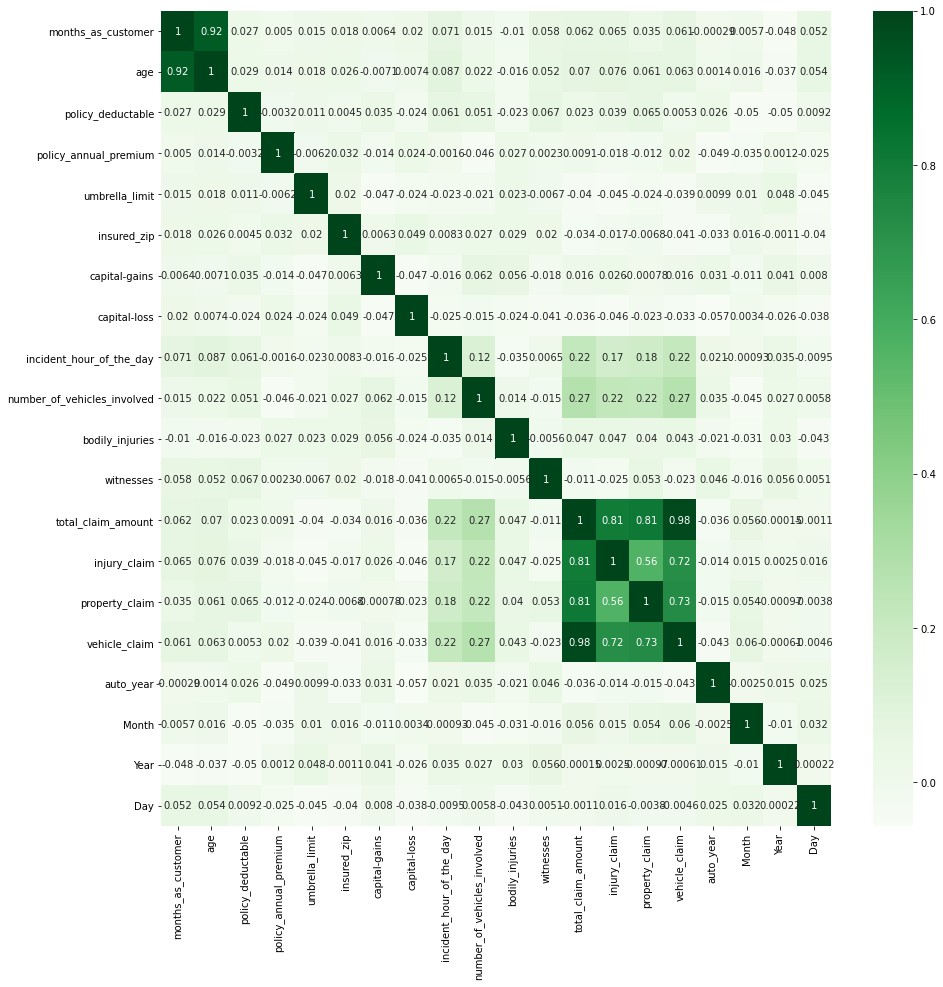

In [27]:
cor=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True, cmap='Greens')
plt.show()

Total_claim_amount, injury_claim, property_claim and Vehicle_claim are highly corelated with each other

# Visualization

<AxesSubplot:ylabel='fraud_reported'>

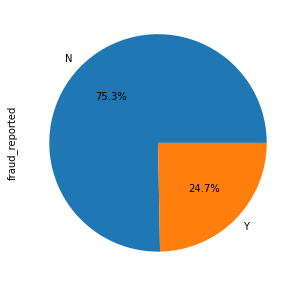

In [28]:
df['fraud_reported'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

Around 24% of claims were found as fraud.

<AxesSubplot:ylabel='police_report_available'>

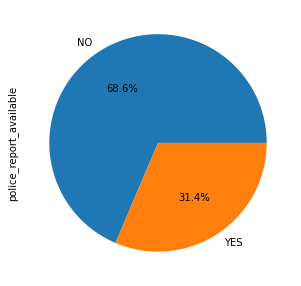

In [29]:
df['police_report_available'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

We have 31.4% of the case where Police report is available.

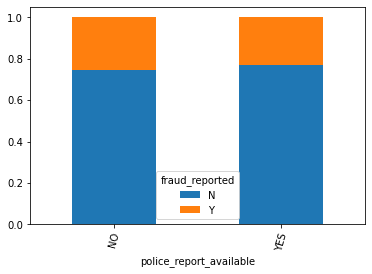

In [30]:
ct = pd.crosstab(df.police_report_available, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

There are many cases where police report is not avaiable and it increase the chances of fraud.

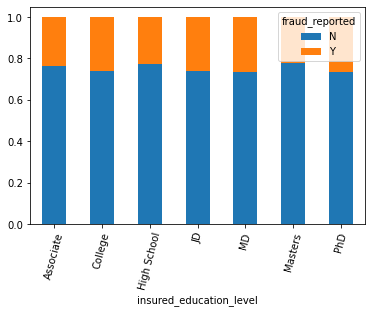

In [31]:
ct = pd.crosstab(df.insured_education_level, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

There is not much relation between education level and person doing fraud.

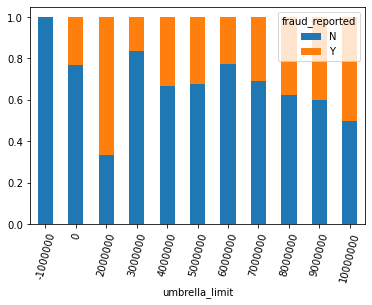

In [33]:
ct = pd.crosstab(df.umbrella_limit , df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Having umbrella unit of 2000000 increases the chance of Insurance fraud.

<AxesSubplot:ylabel='insured_sex'>

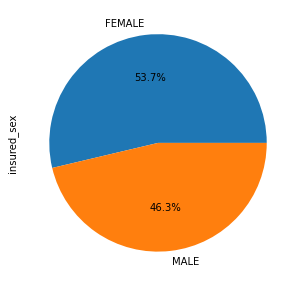

In [34]:
df['insured_sex'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

53.7% cases reported for claim are of female

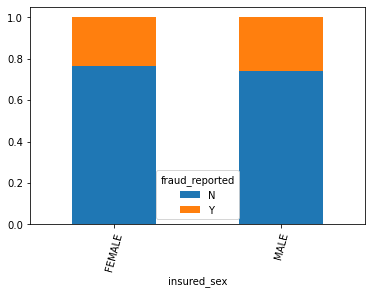

In [35]:
ct = pd.crosstab(df.insured_sex, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Sex has no relation with the Fraud.

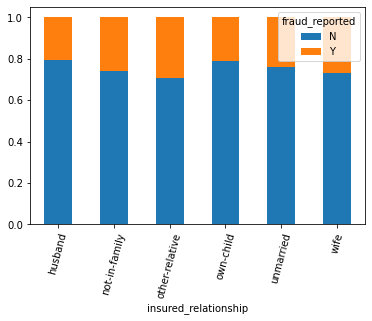

In [36]:
ct = pd.crosstab(df.insured_relationship, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Insured relationship 'other-relative' has higher chance of fraud.

<AxesSubplot:ylabel='insured_hobbies'>

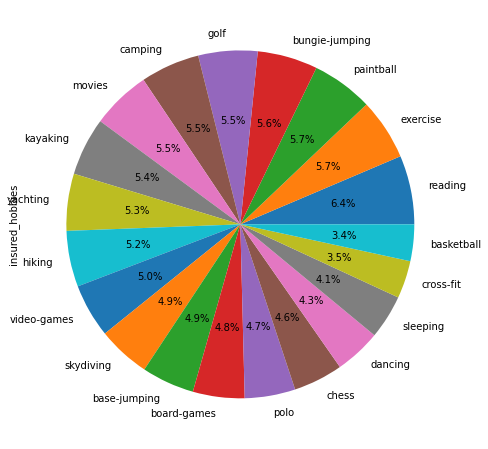

In [37]:
df['insured_hobbies'].value_counts().plot.pie(figsize = (8,8), autopct = '%.1f%%')

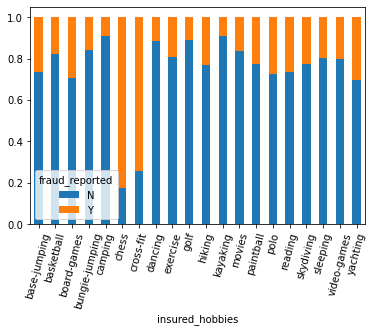

In [38]:
ct = pd.crosstab(df.insured_hobbies, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

People who has Chess and crossfit as hobbies are most likely that their claim is fraud.

<AxesSubplot:ylabel='incident_type'>

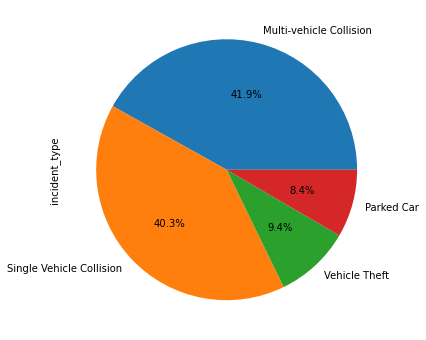

In [39]:
df['incident_type'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

41.9% and 40.3% of the claims reproted are of Multiple and Single vehicle collission.

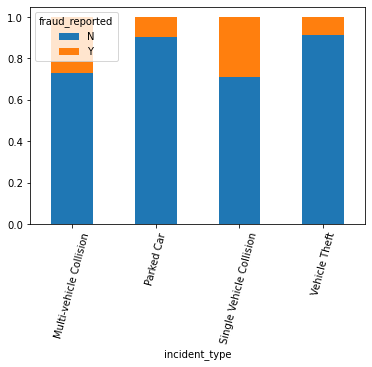

In [40]:
ct = pd.crosstab(df.incident_type, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Incident type of Parked car and vehicle theft has less chance that the claim is fraud.

<AxesSubplot:ylabel='authorities_contacted'>

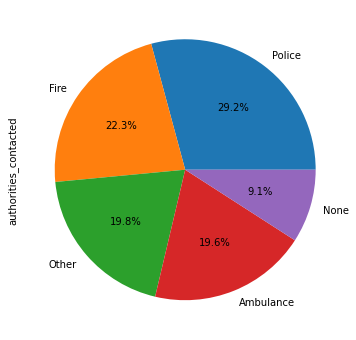

In [41]:
df['authorities_contacted'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

29.2% of the claimers have contacted police. Only 9.1% have contacted no authorities.

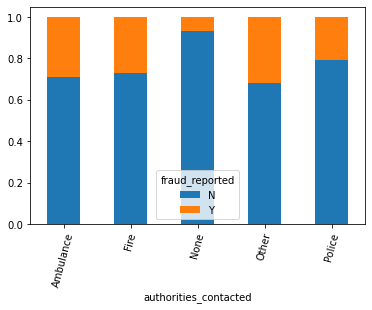

In [42]:
ct = pd.crosstab(df.authorities_contacted, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Chances of Fraud claim is less if None of the authorities are contacted. It inrease if 'Other' is the category of authorities.

<AxesSubplot:ylabel='witnesses'>

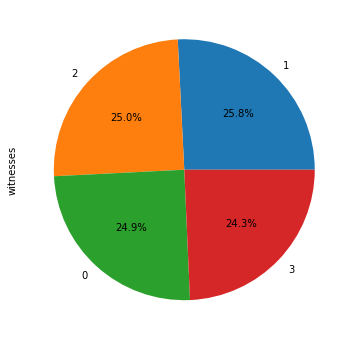

In [43]:
df['witnesses'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

Number of witnesses are euqally disributed.

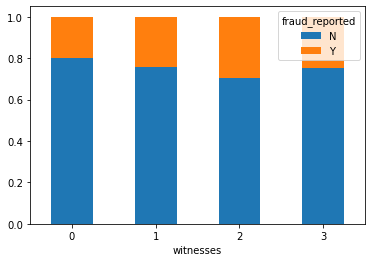

In [44]:
ct = pd.crosstab(df.witnesses, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=360)
plt.show()

Fraud claim is likely if having 2 witnesses.

<AxesSubplot:ylabel='incident_state'>

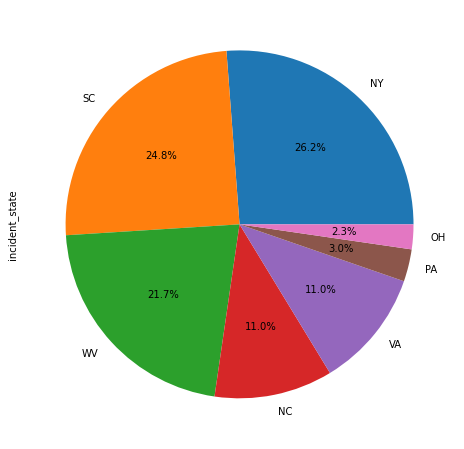

In [45]:
df['incident_state'].value_counts().plot.pie(figsize = (8,8), autopct = '%.1f%%')

Majority of the claims are reported from state NY, SC and WV

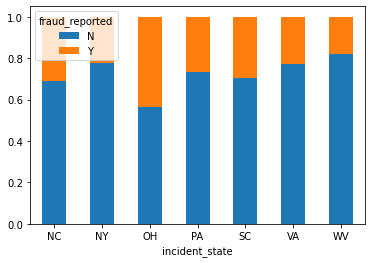

In [46]:
ct = pd.crosstab(df.incident_state, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=360)
plt.show()

NY and WV have least chance that the claim is fraud.

<AxesSubplot:ylabel='incident_city'>

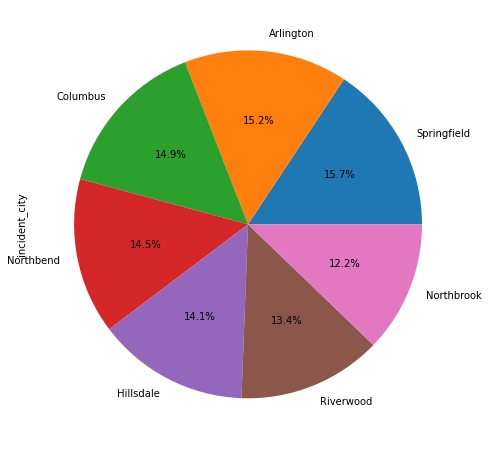

In [47]:
df['incident_city'].value_counts().plot.pie(figsize = (8,8), autopct = '%.1f%%')

Majority of the claims are reported from city Springfiled and Arlington

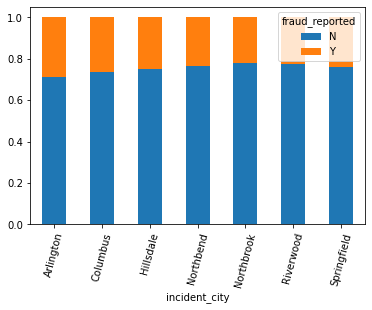

In [48]:
ct = pd.crosstab(df.incident_city, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Chances of fraud claim is likely in city of Arlington and Columbus

<AxesSubplot:ylabel='Month'>

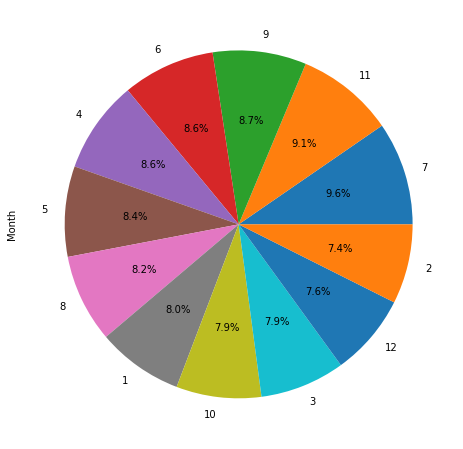

In [49]:
df['Month'].value_counts().plot.pie(figsize = (8,8), autopct = '%.1f%%')

Most of the incidents were reported either in July or Nov. Least cases are reported in Feb.

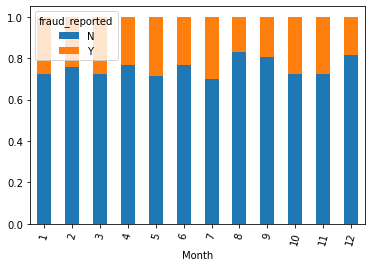

In [50]:
ct = pd.crosstab(df.Month, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

No such strong relation between months and fraud claim. However Dec months is more likely to have less fraud claims.

# Skewness & Outliers Check 

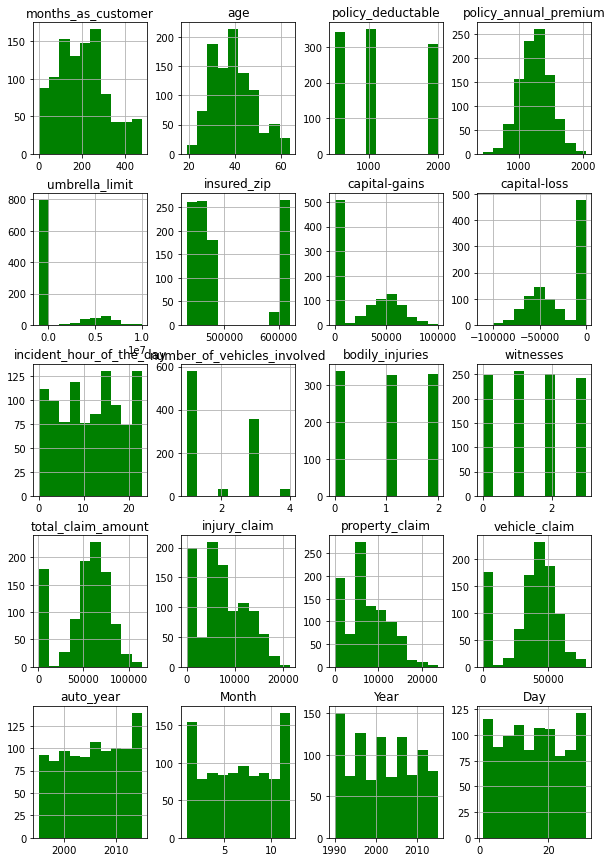

In [52]:
df.hist(figsize=(10,15),color = 'green');

Most of the data is normally distributed.

Let's check for outliers and skewness

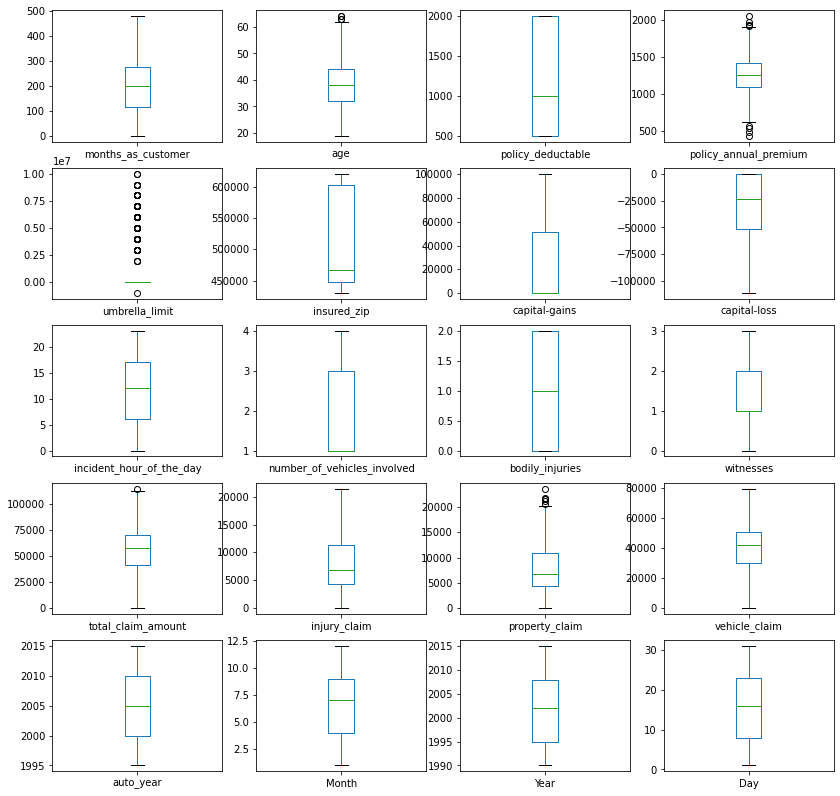

In [53]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(14,14))
plt.show()

Umbrella limit and property claim has outliers present. Also policy_annual_premium has outliers bt it can be varied so wont be considered as outliers.

In [54]:
df[df["property_claim"]>20000]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
163,112,30,OH,500/1000,1000,1166.54,0,479852,FEMALE,Masters,...,10790,21580,75530,Dodge,Neon,1997,Y,9,2002,13
299,119,27,IN,250/500,2000,1097.64,0,614812,MALE,High School,...,7080,21240,35400,Accura,TL,2006,N,5,1997,8
301,107,31,IL,100/300,2000,1018.73,5000000,469646,MALE,Associate,...,14420,21630,57680,Honda,CRV,2001,N,11,1994,25
421,147,37,IN,250/500,1000,1306.78,0,466818,MALE,MD,...,13520,20280,47320,Toyota,Camry,1995,N,2,1992,10
500,1,29,OH,500/1000,500,854.58,0,612826,FEMALE,JD,...,7890,23670,55230,Honda,CRV,2003,N,5,2006,24
591,43,43,IL,500/1000,500,1320.39,0,604861,FEMALE,Associate,...,7270,21810,50890,Honda,CRV,1996,Y,7,1997,11
687,194,41,IL,250/500,500,1203.81,0,613119,MALE,JD,...,13700,20550,61650,Saab,95,1999,N,2,1993,15
745,258,41,IL,100/300,500,1042.25,0,601206,MALE,Masters,...,6770,20310,54160,Mercedes,C300,2008,Y,2,2001,15


In [ ]:
Replacing the property claim of 23670 with 21810 the second highest value.

In [55]:
df.loc[(df["vehicle_claim"] == 55230 )& (df['property_claim']==23670), 'property_claim']=21810

In [56]:
df[df["umbrella_limit"]>6000000]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
31,166,37,IL,100/300,2000,1337.28,8000000,610393,MALE,JD,...,7460,7460,52220,Ford,F150,2006,Y,6,2008,19
48,175,34,IN,500/1000,1000,1123.87,8000000,446326,FEMALE,PhD,...,810,810,5670,Volkswagen,Passat,1995,N,7,2008,1
50,430,59,OH,250/500,2000,1326.62,7000000,477310,MALE,MD,...,16360,8180,57260,Nissan,Pathfinder,1998,N,10,2004,1
66,107,31,IN,250/500,500,1239.22,7000000,476458,FEMALE,High School,...,13800,13800,62100,Audi,A5,2009,Y,8,2011,17
88,31,36,IL,500/1000,2000,1318.24,9000000,601748,FEMALE,College,...,940,470,3290,Dodge,Neon,2002,N,8,1999,15
115,258,46,IN,100/300,1000,1110.37,10000000,455365,MALE,MD,...,4770,9540,33390,Accura,MDX,1997,Y,9,1999,3
119,245,39,OH,250/500,500,964.79,8000000,460675,FEMALE,Associate,...,13240,6620,52960,BMW,3 Series,2010,N,4,2001,21
154,101,33,OH,100/300,1000,1053.04,7000000,619540,FEMALE,Masters,...,9040,9040,36160,Saab,93,2013,Y,6,2012,23
157,428,59,IN,250/500,500,1344.36,7000000,473329,FEMALE,JD,...,1300,650,4550,Saab,92x,2013,N,9,1999,29
161,278,48,IN,500/1000,2000,1142.62,7000000,475588,FEMALE,MD,...,11700,11700,52650,Chevrolet,Silverado,1997,N,7,1999,24


We will not treat the umbrealla unit as we the data is quite a lot.

Let's check for skewness.

In [57]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.368941
vehicle_claim                 -0.621098
auto_year                     -0.048289
Month                         -0.029321
Year                           0.052511
Day                            0.024372
dtype: float64

In [58]:
columns=['umbrella_limit','insured_zip']

In [59]:
for i in columns:
    df[i]=np.cbrt(df[i])

In [60]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.523380
insured_zip                    0.794586
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.368941
vehicle_claim                 -0.621098
auto_year                     -0.048289
Month                         -0.029321
Year                           0.052511
Day                            0.024372
dtype: float64

There is only skewness in the umbrella limit now so we can move forward with creating model

We will now convert the categorical feature to nummerical using label encoder.

In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [62]:
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=le.fit_transform(df[i])

Since or data is imbalance we will now balance it using Oversampling from SMOTE.

But before that we will split the data into input and target variable.

In [63]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']
y=pd.DataFrame(data=y)

In [64]:
x.shape,y.shape

((1000, 38), (1000, 1))

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
SM=SMOTE()
X,Y=SM.fit_resample(x,y)
y_new=pd.DataFrame(data=Y)
x_new=pd.DataFrame(data=X)

In [67]:
x_new.shape,y_new.shape

((1506, 38), (1506, 1))

<AxesSubplot:ylabel='fraud_reported'>

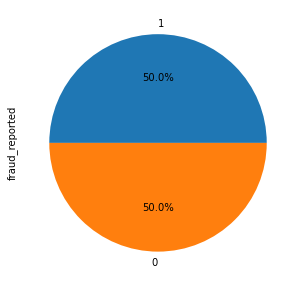

In [68]:
y_new['fraud_reported'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

From above we can observe that now our target variable is now balanced.

We will bring our data to the standard scale using Standard Scaler.

In [69]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x_new)
sc_x=pd.DataFrame(sc_x,columns=x_new.columns)

In [70]:
sc_x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Month,Year,Day
0,1.098678,1.030687,1.388342,0.236916,-0.240593,0.656007,-0.548256,-0.516027,1.249490,0.630138,...,0.661116,-0.261035,1.111030,0.698554,0.985688,-1.733813,-0.186615,1.152749,1.815104,0.165233
1,0.190341,0.343917,0.126518,0.236916,1.478394,-0.255840,2.007404,-0.483059,1.249490,0.630138,...,-2.049752,-1.502201,-1.516465,-2.069213,0.460313,-0.683098,0.343988,-0.094630,0.657435,1.363887
2,-0.663496,-1.144084,1.388342,-1.065259,1.478394,0.683098,2.007404,-1.104647,-0.800327,1.714077,...,-0.844650,-0.003271,-0.857445,-0.952875,-0.590436,1.036254,0.343988,-0.094630,-0.210817,-0.793691
3,0.444675,0.229455,-1.135307,0.236916,1.478394,0.694404,2.167538,1.577381,-0.800327,1.714077,...,0.326637,-0.297859,-0.322930,0.621054,-0.853123,1.418332,1.582062,-0.406475,-1.657904,1.124156
4,0.190341,0.572840,-1.135307,1.539092,-0.240593,1.425699,2.167538,1.612357,1.249490,-1.537739,...,-1.991493,-1.389565,-1.544372,-2.009949,-1.641185,1.131773,0.697723,-0.094630,1.815104,-1.153287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,1.380262,1.374072,0.126518,0.236916,0.697974,0.708877,-0.548256,-0.627606,1.249490,-0.453800,...,-0.694481,-0.916275,-0.187691,-0.680429,-1.378498,1.036254,-1.424689,-1.342009,-0.210817,-1.273153
1502,0.344758,0.572840,0.126518,0.236916,1.478394,1.585902,-0.242225,1.658741,-0.800327,-0.995770,...,0.269682,0.637023,-0.297599,0.288603,-0.065061,-0.874137,0.343988,1.152749,-0.066109,-0.793691
1503,0.517342,0.000532,-1.135307,-1.065259,-1.100087,0.434531,-0.548256,-0.642728,-0.800327,0.630138,...,1.027454,1.271469,-0.225901,1.162584,-0.590436,0.367617,-1.778425,1.464593,-1.223778,-0.314229
1504,-0.291078,-0.342853,1.388342,0.236916,-0.945378,-0.276609,-0.548256,-0.948211,-0.800327,0.630138,...,-0.508827,-0.826600,-0.009949,-0.491637,-1.641185,1.036254,-0.009748,-1.030164,-1.368487,-1.393018


From co-relation heatmap we have understood that most of the features are co related to each other hence we will use PCA to avoid multi colinearity.

In [71]:
from sklearn.decomposition import PCA

In [72]:
testPCA=PCA()
Y=testPCA.fit(sc_x)

Checking the cumulative sum of the expalined variance ratio.

In [73]:
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 10.15854455,  15.55904475,  20.16080692,  24.42008143,
        28.08373767,  31.44648593,  34.69993851,  37.90878153,
        40.97880142,  43.97711875,  46.9119694 ,  49.80484837,
        52.65478898,  55.44200749,  58.16859579,  60.8070035 ,
        63.38513463,  65.91501538,  68.39064839,  70.77798594,
        73.15387788,  75.51774011,  77.83431695,  80.07666946,
        82.21368969,  84.32106327,  86.38795981,  88.42438248,
        90.39368633,  92.33801816,  94.16760843,  95.96536113,
        97.63001088,  98.83184427,  99.43413918,  99.81869469,
        99.9999939 , 100.        ])

The above variance shows the number of components against the data we will get. We take 32 components with 95.96% variance ratio

In [74]:
FinalPCA=PCA(n_components=32)
final_x=FinalPCA.fit_transform(sc_x)
finalx=pd.DataFrame(final_x)

In [75]:
finalx

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.106695,0.947555,2.309756,2.042012,3.003797,-0.251442,0.837687,-1.788927,0.376146,0.221487,...,-0.259510,0.901131,0.508248,-1.588888,0.042027,-0.852903,1.714862,0.380255,0.190830,-0.015112
1,4.273882,0.787395,0.157113,-0.671708,-0.119896,-0.601490,-0.910205,-0.997387,-1.145801,0.560610,...,-0.121913,-0.306026,0.089998,-0.260616,0.043766,-0.016407,-0.652087,0.249359,0.963453,-1.190218
2,0.931573,-1.069135,-1.139201,0.315893,-2.642639,0.722350,0.165487,-0.242099,1.195556,-0.266749,...,0.740221,-0.423511,-1.604769,0.642403,-1.302516,-0.250342,0.101406,-0.849765,1.457030,0.580200
3,-0.107010,1.698852,-0.466740,-2.716707,-3.317482,-0.063835,1.320963,-1.749314,1.058913,0.610935,...,0.353094,1.473876,1.182045,0.664320,0.026601,0.546561,0.844354,-0.866887,-0.239116,1.663937
4,3.516394,1.531555,-1.163732,-1.358993,-1.663615,0.196920,2.458612,2.168984,-1.383429,-0.816288,...,-0.511107,0.492670,1.198912,-0.211366,2.298530,0.399198,-0.840893,0.403279,-1.524281,0.635595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,0.588567,2.902014,-0.353931,-0.515699,-0.563011,-1.747597,1.992345,1.232382,0.179714,-1.160421,...,0.139665,-0.638418,-0.356125,0.226611,-0.025524,0.041898,-0.249379,-0.034555,0.096520,-0.117197
1502,-0.551534,1.035653,0.037698,-0.384326,0.469190,0.987593,2.239487,0.197253,0.847279,2.416576,...,-1.767046,0.571058,0.012221,-0.160699,1.186549,0.697765,0.915798,0.428720,0.165027,0.383109
1503,-2.024999,-0.140588,-1.041574,-1.545718,1.269096,0.477373,-0.206049,-0.871690,0.580708,-0.999287,...,-0.374747,-1.094301,-0.864455,1.109255,0.026225,-0.944928,0.700274,-0.648516,0.132198,1.278693
1504,0.378684,-0.760682,-0.655735,0.647142,-0.958491,0.308009,0.722077,-0.329558,1.998317,-1.085846,...,-1.517499,0.246126,-0.464451,-0.763398,-0.408229,0.099240,0.722501,-1.224111,0.467945,0.368802


This is our final dataset after the PCA. I will reassign x to finalx

In [76]:
x=finalx
x

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.106695,0.947555,2.309756,2.042012,3.003797,-0.251442,0.837687,-1.788927,0.376146,0.221487,...,-0.259510,0.901131,0.508248,-1.588888,0.042027,-0.852903,1.714862,0.380255,0.190830,-0.015112
1,4.273882,0.787395,0.157113,-0.671708,-0.119896,-0.601490,-0.910205,-0.997387,-1.145801,0.560610,...,-0.121913,-0.306026,0.089998,-0.260616,0.043766,-0.016407,-0.652087,0.249359,0.963453,-1.190218
2,0.931573,-1.069135,-1.139201,0.315893,-2.642639,0.722350,0.165487,-0.242099,1.195556,-0.266749,...,0.740221,-0.423511,-1.604769,0.642403,-1.302516,-0.250342,0.101406,-0.849765,1.457030,0.580200
3,-0.107010,1.698852,-0.466740,-2.716707,-3.317482,-0.063835,1.320963,-1.749314,1.058913,0.610935,...,0.353094,1.473876,1.182045,0.664320,0.026601,0.546561,0.844354,-0.866887,-0.239116,1.663937
4,3.516394,1.531555,-1.163732,-1.358993,-1.663615,0.196920,2.458612,2.168984,-1.383429,-0.816288,...,-0.511107,0.492670,1.198912,-0.211366,2.298530,0.399198,-0.840893,0.403279,-1.524281,0.635595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,0.588567,2.902014,-0.353931,-0.515699,-0.563011,-1.747597,1.992345,1.232382,0.179714,-1.160421,...,0.139665,-0.638418,-0.356125,0.226611,-0.025524,0.041898,-0.249379,-0.034555,0.096520,-0.117197
1502,-0.551534,1.035653,0.037698,-0.384326,0.469190,0.987593,2.239487,0.197253,0.847279,2.416576,...,-1.767046,0.571058,0.012221,-0.160699,1.186549,0.697765,0.915798,0.428720,0.165027,0.383109
1503,-2.024999,-0.140588,-1.041574,-1.545718,1.269096,0.477373,-0.206049,-0.871690,0.580708,-0.999287,...,-0.374747,-1.094301,-0.864455,1.109255,0.026225,-0.944928,0.700274,-0.648516,0.132198,1.278693
1504,0.378684,-0.760682,-0.655735,0.647142,-0.958491,0.308009,0.722077,-0.329558,1.998317,-1.085846,...,-1.517499,0.246126,-0.464451,-0.763398,-0.408229,0.099240,0.722501,-1.224111,0.467945,0.368802


In [77]:
y=y_new

In [78]:
x.shape,y.shape

((1506, 32), (1506, 1))

# Model Fitting and Selection

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score

We will check the best possible random state to train our model. Using LogisticRegression to check and then later will run with other models.

In [80]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.8145695364238411  on Random state 96


We can see that the best random state is 96. We will split the data with this random state.

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=96)

In [82]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
adc=AdaBoostClassifier(n_estimators=100)

model=[lg,sv,knn,rfc,dtc,gnb,adc]

Test=[]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    Test.append(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('-------------------------------------------------------------------------------------------')

Accuracy score of LogisticRegression()
0.8145695364238411
[[113  34]
 [ 22 133]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       147
           1       0.80      0.86      0.83       155

    accuracy                           0.81       302
   macro avg       0.82      0.81      0.81       302
weighted avg       0.82      0.81      0.81       302

-------------------------------------------------------------------------------------------
Accuracy score of SVC(probability=True)
0.8708609271523179
[[133  14]
 [ 25 130]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       147
           1       0.90      0.84      0.87       155

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302

-------------------------------------------------------------------------------------------

From above we can observe that SVC and RandomForest has performed well with 87% accuracy.

Cross Validation

In [83]:
cv=[]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    cv.append(score.mean())
    print('Mean Accuracy of', m)
    print(score.mean())
    print('-------------------------------------------------------------------------------')

Mean Accuracy of LogisticRegression()
0.7537699940595367
-------------------------------------------------------------------------------
Mean Accuracy of SVC(probability=True)
0.8135706585113638
-------------------------------------------------------------------------------
Mean Accuracy of KNeighborsClassifier()
0.6806274889441377
-------------------------------------------------------------------------------
Mean Accuracy of RandomForestClassifier()
0.8075685903500472
-------------------------------------------------------------------------------
Mean Accuracy of DecisionTreeClassifier()
0.7033046577633055
-------------------------------------------------------------------------------
Mean Accuracy of GaussianNB()
0.7889727398737102
-------------------------------------------------------------------------------
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.7504433345800973
-------------------------------------------------------------------------------


ROC_AUC Curve

AUC Score of LogisticRegression()
0.8133859995611147




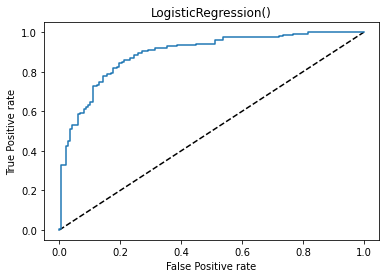



------------------------------------------------------------------------
AUC Score of SVC(probability=True)
0.8717357910906299




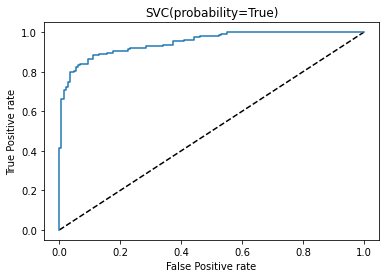



------------------------------------------------------------------------
AUC Score of KNeighborsClassifier()
0.6843756857581742




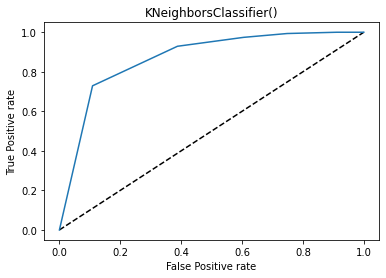



------------------------------------------------------------------------
AUC Score of RandomForestClassifier()
0.8719113451832347




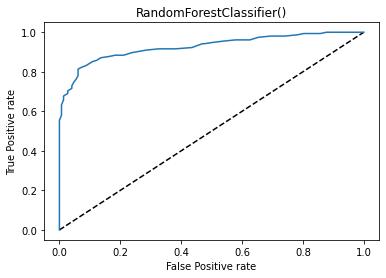



------------------------------------------------------------------------
AUC Score of DecisionTreeClassifier()
0.7112793504498574




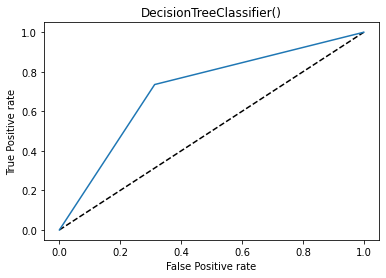



------------------------------------------------------------------------
AUC Score of GaussianNB()
0.821066491112574




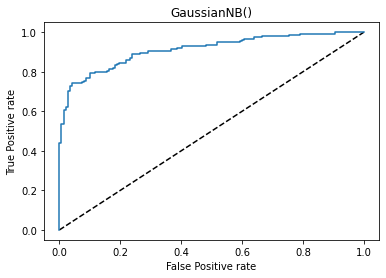



------------------------------------------------------------------------
AUC Score of AdaBoostClassifier(n_estimators=100)
0.780074610489357




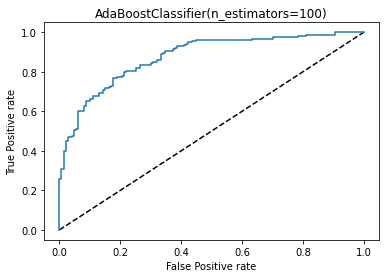



------------------------------------------------------------------------


In [87]:
auc=[]
for m in model:
    y_pred_prob=m.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    auc.append(auc_score)
    print('AUC Score of', m)
    print(auc_score)
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(m)
    plt.show()
    print('\n')
    print('------------------------------------------------------------------------')

In [88]:
Performance={'Model':['LogisticRegression','SVC','KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','GaussianNB','AdaBoostClassifier'],
           'Test Score':Test,'Cross Validation Score':cv,'ROC AUC Score':auc}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Test Score,Cross Validation Score,ROC AUC Score
0,LogisticRegression,0.814570,0.753770,0.813386
1,SVC,0.870861,0.813571,0.871736
2,KNeighborsClassifier,0.692053,0.680627,0.684376
3,RandomForestClassifier,0.870861,0.807569,0.871911
4,DecisionTreeClassifier,0.711921,0.703305,0.711279
5,GaussianNB,0.821192,0.788973,0.821066
6,AdaBoostClassifier,0.781457,0.750443,0.780075


We can conclude that RFC and SVC has performed well.

# HyperTuning

In [89]:
from sklearn.model_selection import GridSearchCV

RFC

In [99]:
parameters = {'max_depth': [10, 20, 30, 40, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [5, 10, 20, 30, 50,100],
             'criterion':['gini', 'entropy']}

In [100]:

GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

Random Forest classifier Performance after HyperTuning
-----------------------------------------------
Accuracy Score 86.75496688741721
Cross Validation Score 80.95619458317749
AUC ROC Score 86.8509984639017


AUC ROC Curve with Final Mod


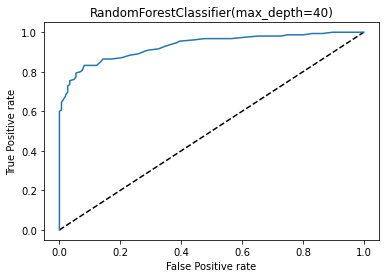

In [102]:
Finalmod=RandomForestClassifier(max_features= 'auto', min_samples_leaf= 1, min_samples_split=2,n_estimators=100,max_depth=40,criterion='gini')
Finalmod.fit(x_train,y_train)
pred1=Finalmod.predict(x_test)
acc1=accuracy_score(y_test,pred1)

cvs1=cross_val_score(Finalmod,x,y,cv=5)
y_pred_prob=Finalmod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
auc_score1=roc_auc_score(y_test,Finalmod.predict(x_test))

print('Random Forest classifier Performance after HyperTuning')
print('-----------------------------------------------')
print('Accuracy Score',acc1*100)
print('Cross Validation Score',cvs1.mean()*100)
print('AUC ROC Score',auc_score1*100)
print('\n')
print('AUC ROC Curve with Final Mod')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=RandomForestClassifier)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(Finalmod)
plt.show()

We got the accuracy of 86% with the CV score of 80% and AUC ROC score of 86%

In [103]:
import joblib
joblib.dump(Finalmod,'Insurance.obj')

['Insurance.obj']